# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [30]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io 
from skimage.transform import rescale
from skimage import morphology
from skimage import filters
from skimage.draw import circle_perimeter 
from skimage import measure


Pretty printing has been turned ON


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

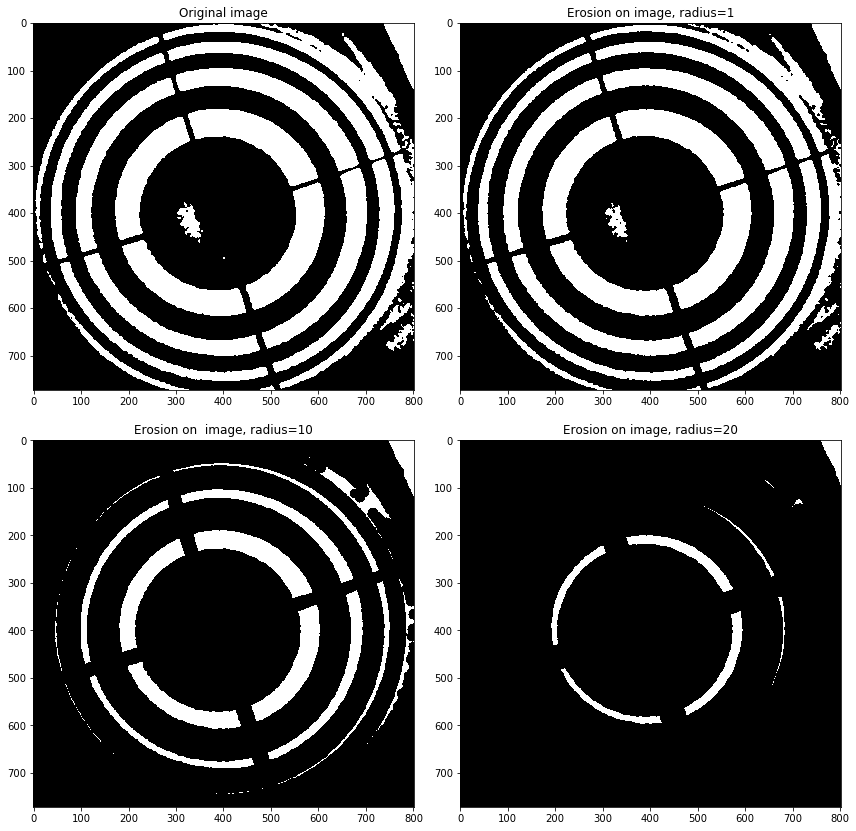

In [31]:
# Import image
file_location = 'images/FindingContours.png'
img = io.imread(file_location)

# Define disks
disk1 = morphology.disk(1)
disk10 = morphology.disk(10)
disk20 = morphology.disk(20)

# Erosion on images
erosion_disk1 = morphology.erosion(img, disk1)
erosion_disk10 = morphology.erosion(img, disk10)
erosion_disk20 = morphology.erosion(img, disk20)

# Show the images
fig = plt.figure(figsize=(12,12))

# Show original image
plt.subplot (221)
io.imshow(img)
plt.title('Original image')

# Erosion on images
plt.subplot (222)
io.imshow(erosion_disk1)
plt.title ('Erosion on image, radius=1')

plt.subplot (223)
io.imshow(erosion_disk10)
plt.title ('Erosion on  image, radius=10')

plt.subplot (224)
io.imshow(erosion_disk20)
plt.title ('Erosion on image, radius=20')

** Q.1.2 Dilation **

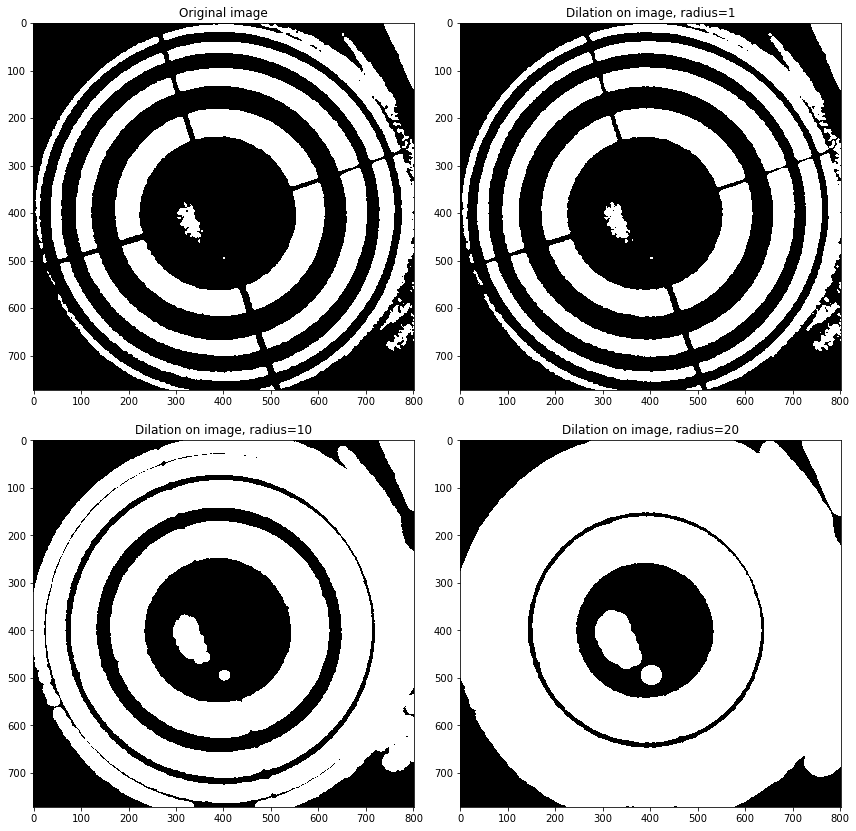

In [32]:
# Dilation on images
Dilation_disk1 = morphology.dilation(img, disk1)
Dilation_disk10 = morphology.dilation(img, disk10)
Dilation_disk20 = morphology.dilation(img, disk20)

# Display the images
fig = plt.figure(figsize=(12,12))

# Show original image
plt.subplot (221)
io.imshow(img)
plt.title('Original image')

# Show dilation on images
plt.subplot (222)
io.imshow(Dilation_disk1)
plt.title ('Dilation on image, radius=1')

plt.subplot (223)
io.imshow(Dilation_disk10)
plt.title ('Dilation on image, radius=10')

plt.subplot (224)
io.imshow(Dilation_disk20)
plt.title ('Dilation on image, radius=20')


** Q.1.3 Opening **

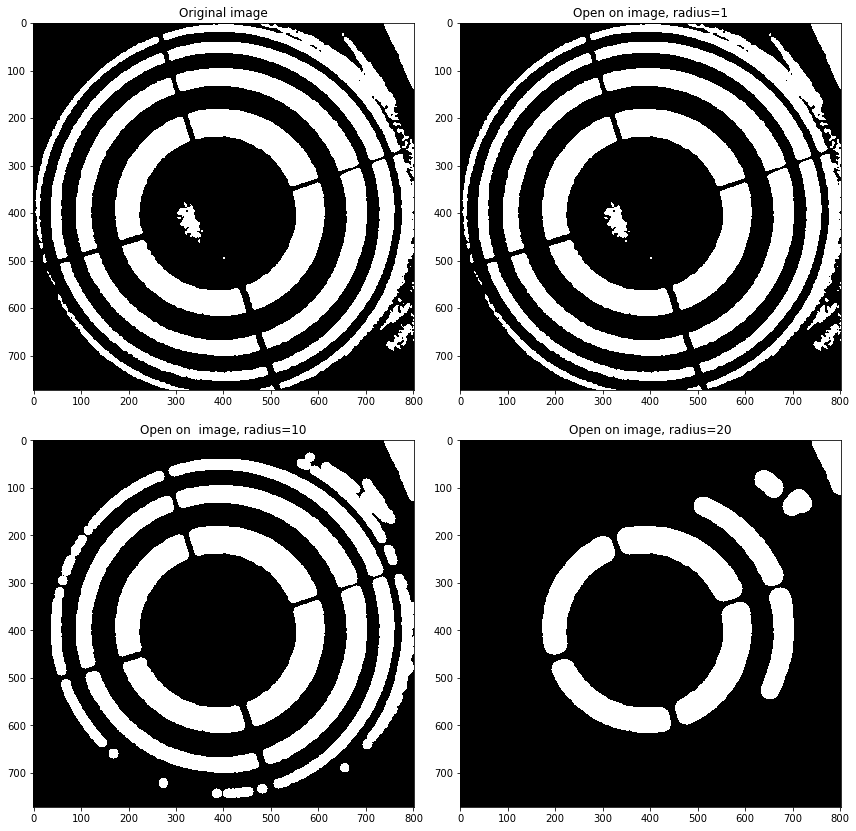

In [34]:
# Open on images
open_disk1 = morphology.opening(img, disk1)
open_disk10 = morphology.opening(img, disk10)
open_disk20 = morphology.opening(img, disk20)

# Show the images
fig = plt.figure(figsize=(12,12))

# Show original image
plt.subplot (221)
io.imshow(img)
plt.title('Original image')

# Show open images
plt.subplot (222)
io.imshow(open_disk1)
plt.title ('Open on image, radius=1')

plt.subplot (223)
io.imshow(open_disk10)
plt.title ('Open on  image, radius=10')

plt.subplot (224)
io.imshow(open_disk20)
plt.title ('Open on image, radius=20')

** Q.1.4 Closing**

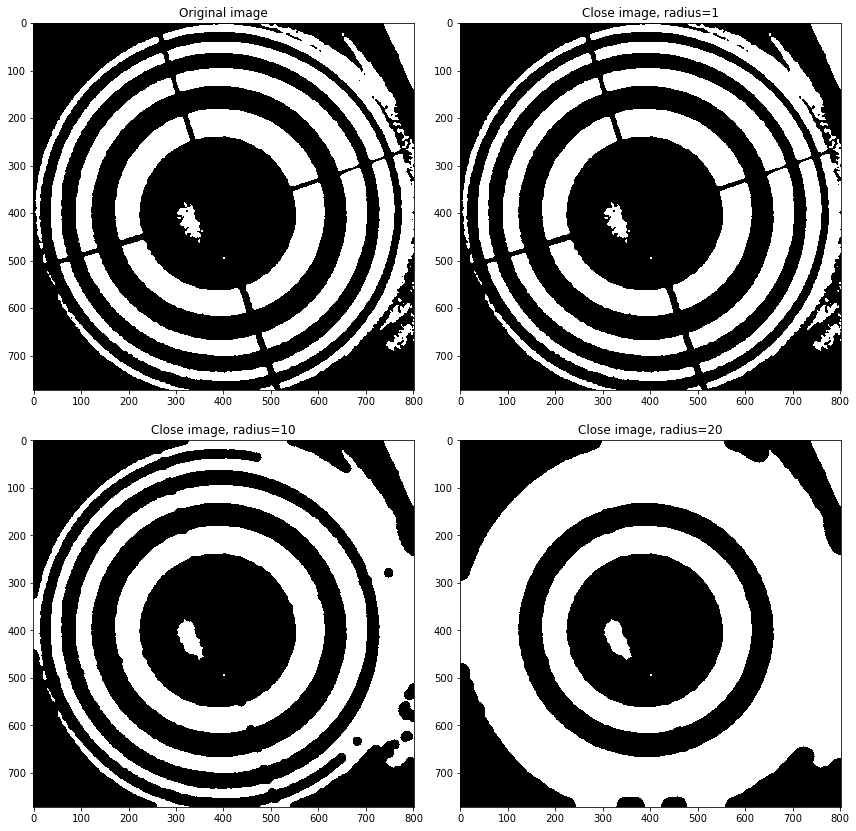

In [35]:
# Close on images
close_disk1 = morphology.closing(img, disk1)
close_disk10 = morphology.closing(img, disk10)
close_disk20 = morphology.closing(img, disk20)

# Display the images
fig = plt.figure(figsize=(12,12))

# Show original image
plt.subplot (221)
io.imshow(img)
plt.title('Original image')

# Show opened images
plt.subplot (222)
io.imshow(close_disk1)
plt.title ('Close image, radius=1')

plt.subplot (223)
io.imshow(close_disk10)
plt.title ('Close image, radius=10')

plt.subplot (224)
io.imshow(close_disk20)
plt.title ('Close image, radius=20')


** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

/home/akshay/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


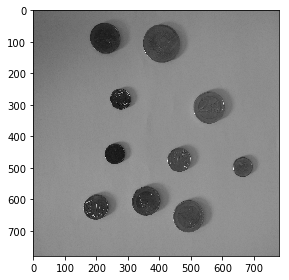

In [50]:
# Read the image
coins = io.imread('images/coins.jpg',as_grey=True)
img = rescale(img_as_ubyte(coins),scale=0.25)
io.imshow(img)

**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

0.395320159314


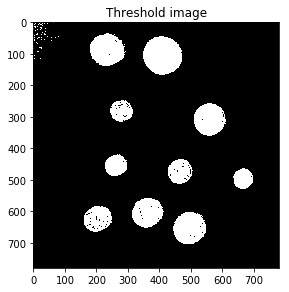

In [55]:
# Threshold image
threshold_value = filters.threshold_otsu(img)
print(threshold_value)
threshold_image = img <= threshold_value
io.imshow(threshold_image)
plt.title('Threshold image')

**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

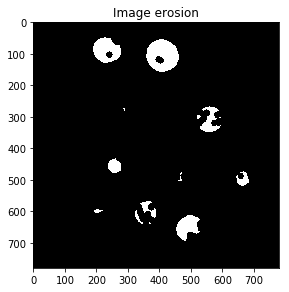

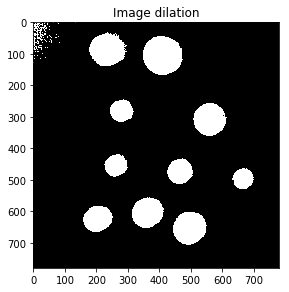

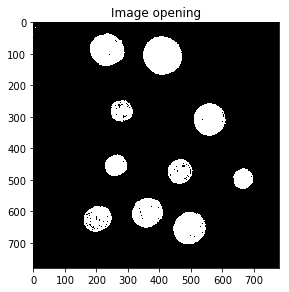

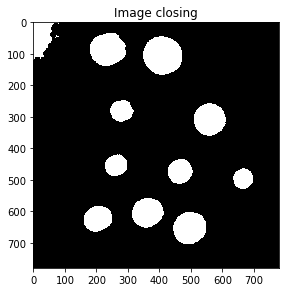

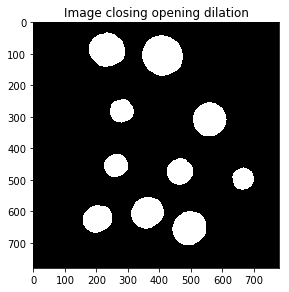

In [42]:
# Clean the thresholded image
img_erosion = morphology.erosion(threshold_image, morphology.disk(10));
img_dilation = morphology.dilation(threshold_image, morphology.disk(1));
img_opening = morphology.opening(threshold_image, morphology.disk(1));
img_closing = morphology.closing(threshold_image, morphology.disk(10));
img_closing_opening_dilation = morphology.dilation(img_opening, morphology.disk(3));
img_closing_opening_dilation_erosion = morphology.erosion(img_closing_opening_dilation, morphology.disk(1));
img_c_o_e_o = morphology.dilation(morphology.opening(img_closing_opening_dilation_erosion, morphology.disk(10)), morphology.disk(1));

# Show the images
plt.show()
io.imshow(img_erosion)
plt.title('Image erosion')

plt.show()
io.imshow(img_dilation)
plt.title('Image dilation')

plt.show()
io.imshow(img_opening)
plt.title('Image opening')

plt.show()
io.imshow(img_closing)
plt.title('Image closing')

plt.show()
io.imshow(img_c_o_e_o)
plt.title('Image closing opening dilation')

**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


Number of regions found: 10
Radius of each region:
55.5203830840875
64.19376750538447
37.63613946086751
53.52372348458314
37.43260769678018
41.66225881250572
34.65979674576333
50.86474962979618
45.27950945968602
53.96496223194732


/home/akshay/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


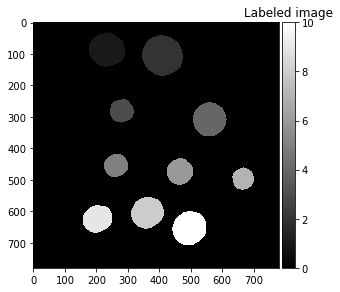

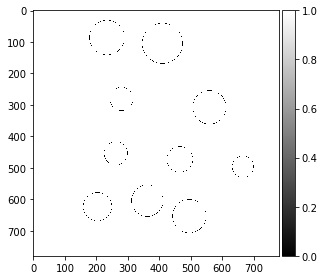

In [43]:
# Use the functions label and regionprops
labeled = measure.label(img_c_o_e_o)
regions = measure.regionprops(labeled)

print('Number of regions found:', len(regions))
print('Radius of each region:')

for i in range (0, len(regions)):
    print(regions[i].equivalent_diameter/2)
mask = np.zeros(img_c_o_e_o.shape)

for i in range (0, len(regions)):
    r, c = regions[i].centroid
    rad = int(regions[i].equivalent_diameter/2)
    rr, cc = circle_perimeter(int(r),int(c),rad)
    mask[rr, cc] = 1
    
plt.show()
io.imshow(labeled, cmap='gray')
plt.title('Labeled image')

plt.show()
io.imshow(1-mask, cmap='gray')

### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

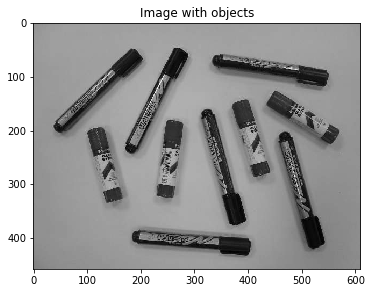

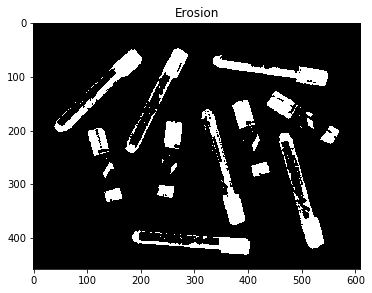

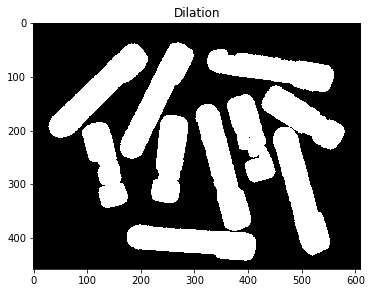

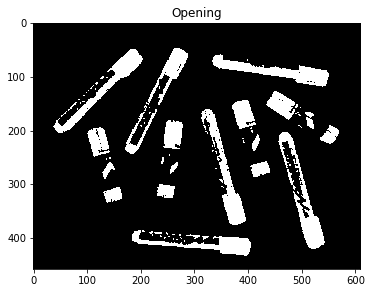

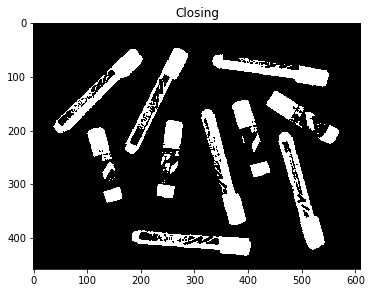

In [45]:
# Import Image
marker = io.imread('images/objets4.jpg', as_grey=True)
plt.figure()
io.imshow(marker)
plt.title('Image with objects')

thresh = filters.threshold_li(marker)
logical_img = marker <= thresh

marker_eroded = morphology.erosion(logical_img, morphology.disk(1))
marker_dilated = morphology.dilation(logical_img, morphology.disk(10))
marker_opened = morphology.opening(logical_img, morphology.disk(1))
marker_closed = morphology.closing(logical_img, morphology.disk(1))

# Show the images

plt.figure()
io.imshow(marker_eroded)
plt.title('Erosion')

plt.figure()
io.imshow(marker_dilated)
plt.title('Dilation')

plt.figure()
io.imshow(marker_opened)
plt.title('Opening')

plt.figure()
io.imshow(marker_closed)
plt.title('Closing')


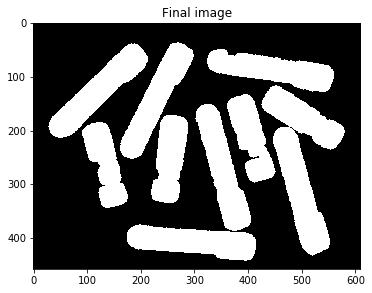

In [47]:
# Refined objects
refined_object = morphology.remove_small_holes(marker_dilated,52) 

io.imshow(refined_object)
plt.title('Final image')

Number of regions found: 10


/home/akshay/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


Mean area: 9640.7


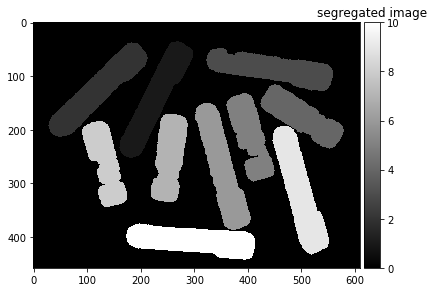

In [56]:
labeled = measure.label(refined_object)
regions = measure.regionprops(labeled)
print('Number of regions found:', len(regions))
io.imshow(labeled, cmap='gray')
plt.title('segregated image')

areas = []
for i in range (0, len(regions)):
    areas.append(regions[i].area)
mean_area = np.mean(areas)
print('Mean area:',mean_area)

In [57]:
# Find number of markers and glues
glues = 0
markers = 0

for i in range (0, len(regions)):
    if regions[i].area > mean_area:
        markers = markers +1
    else:
        glues = glues + 1
print('Number of markers:', markers)
print('Number of glues:', glues)

Number of markers: 6
Number of glues: 4
